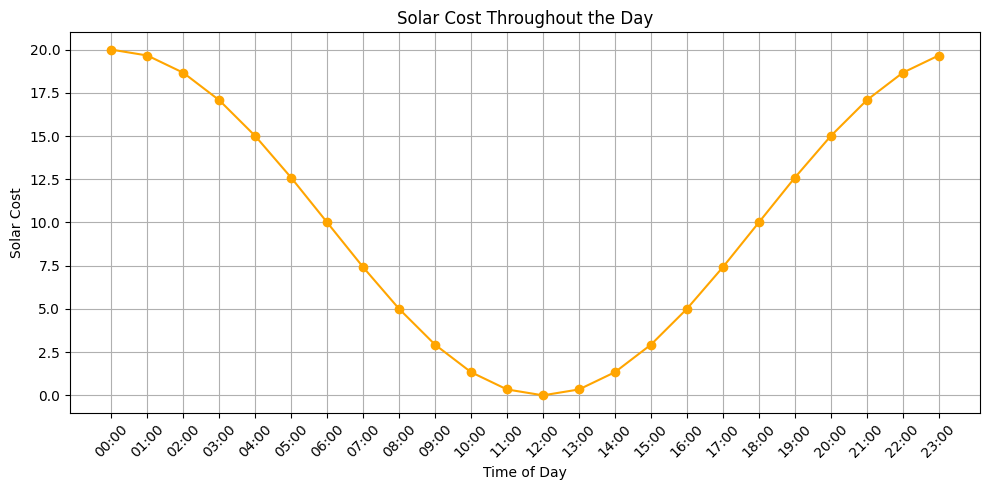

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import datetime
from dateutil import parser

def solar_cost(t=None):
    """
    Calculate the cost of solar energy based on the time of day, which follows a periodic dependence
    with the cost being highest at midnight and zero at midday.

    Parameters:
    - t (str, datetime.datetime, optional): The time at which to calculate the solar cost. 
      Can be a string (e.g., '19:20:10' or '8:30 PM') or a datetime.datetime object. 
      If None, the current system time is used.

    Returns:
    - float: The cost of solar energy at the specified time.

    Example usage:
    - solar_cost()  # Uses current time
    - solar_cost('15:00:00')  # Uses specified time, 24-hour format
    - solar_cost('3:00 PM')  # Uses specified time, 12-hour format
    - solar_cost(datetime.datetime.now())  # Uses a datetime object
    """
    if t is None:
        # Use the current time
        now = datetime.datetime.now()
    elif isinstance(t, str):
        # Parse the string into a datetime object using dateutil.parser
        now = parser.parse(t)
    elif isinstance(t, datetime.datetime):
        now = t
    else:
        raise TypeError("Invalid type for t. Expected str or datetime.datetime, got {}".format(type(t)))

    # Convert time to radians from 0 to 2*pi over 24 hours
    seconds_since_midnight = (now - now.replace(hour=0, minute=0, second=0, microsecond=0)).total_seconds()
    radians = 2 * np.pi * seconds_since_midnight / 86400
    
    A = 10  # Scaling factor for cost
    return A * ( np.cos(radians)  + 1 ) # Inverted cost function

# Generate times for every hour of the day
date_today = datetime.date.today()
times = [datetime.datetime.combine(date_today, datetime.time(hour=h)) for h in range(24)]

# Calculate solar costs for these times
costs = [solar_cost(t) for t in times]

# Plotting
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(times, costs, marker='o', linestyle='-', color='orange')
plt.title('Solar Cost Throughout the Day')
plt.xlabel('Time of Day')
plt.ylabel('Solar Cost')
plt.xticks(times, [t.strftime('%H:%M') for t in times], rotation=45)  # Set x-axis labels to hours
plt.grid(True)
plt.tight_layout()
plt.show()
